In [136]:
import pandas as pd
df = pd.read_csv("Data/character-deaths.csv")
df.columns

Index(['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD'],
      dtype='object')

In [137]:
#刪掉 Book of Death、 Death Chapter
data = df.drop(['Book of Death','Death Chapter'], axis=1)
data

,Name,Allegiances,Death Year,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),NaN,299.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,NaN,NaN,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,NaN,300.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,NaN,300.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,73.0,1,0,0,0,1,0,0


In [138]:
#根據Death Year轉換類別0和1
data['Deathindex'] = data['Death Year'].notnull().astype(int)
data

,Name,Allegiances,Death Year,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Deathindex
0,Addam Marbrand,Lannister,NaN,56.0,1,1,1,1,1,1,0,0
1,Aegon Frey (Jinglebell),NaN,299.0,49.0,1,1,0,0,1,0,0,1
2,Aegon Targaryen,House Targaryen,NaN,5.0,1,1,0,0,0,0,1,0
3,Adrack Humble,House Greyjoy,300.0,20.0,1,1,0,0,0,0,1,1
4,Aemon Costayne,Lannister,NaN,NaN,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,NaN,NaN,21.0,1,0,0,0,1,0,0,0
913,Yurkhaz zo Yunzak,NaN,300.0,47.0,1,0,0,0,0,0,1,1
914,Yezzan Zo Qaggaz,NaN,300.0,25.0,1,1,0,0,0,0,1,1
915,Torwynd the Tame,Wildling,300.0,73.0,1,0,0,0,1,0,0,1


In [139]:
#刪掉 Death Year、Book Intro Chapter
data = data.drop(['Death Year','Book Intro Chapter'], axis=1)
data

,Name,Allegiances,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Deathindex
0,Addam Marbrand,Lannister,1,1,1,1,1,1,0,0
1,Aegon Frey (Jinglebell),NaN,1,1,0,0,1,0,0,1
2,Aegon Targaryen,House Targaryen,1,1,0,0,0,0,1,0
3,Adrack Humble,House Greyjoy,1,1,0,0,0,0,1,1
4,Aemon Costayne,Lannister,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
912,Zollo,NaN,1,0,0,0,1,0,0,0
913,Yurkhaz zo Yunzak,NaN,1,0,0,0,0,0,1,1
914,Yezzan Zo Qaggaz,NaN,1,1,0,0,0,0,1,1
915,Torwynd the Tame,Wildling,1,0,0,0,1,0,0,1


In [141]:
print(data.isnull().mean().round(4))

Name           0.0000
Allegiances    0.2759
Gender         0.0000
Nobility       0.0000
GoT            0.0000
CoK            0.0000
SoS            0.0000
FfC            0.0000
DwD            0.0000
Deathindex     0.0000
dtype: float64


In [142]:
#刪掉姓名>
#Allegiances轉換成 dummy 變數
data = data.drop(['Name'],axis=1)
data = pd.get_dummies(data, drop_first=False)  # 將類別變數轉為 0/1
data = data.astype(int)
data

,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Deathindex,Allegiances_Arryn,Allegiances_Baratheon,...,Allegiances_House Tully,Allegiances_House Tyrell,Allegiances_Lannister,Allegiances_Martell,Allegiances_Night's Watch,Allegiances_Stark,Allegiances_Targaryen,Allegiances_Tully,Allegiances_Tyrell,Allegiances_Wildling
0,1,1,1,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
913,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
914,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
915,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [143]:
#亂數拆成訓練集(75%)與測試集(25%) 
from sklearn.model_selection import train_test_split
X = data.drop('Deathindex', axis=1)
y = data['Deathindex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [91]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)  # 只對 X_train 訓練 scaler
# X_test_scaled = scaler.transform(X_test) 

In [124]:
#使用決策樹演算法
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth = 3) #深度為3
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [144]:
y_pred = dtree.predict(X_test)

In [146]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:","\n",cm)

from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)
accuracy = round(accuracy_score(y_test, y_pred), 3)

print("precision:", precision)
print("recall:", recall)
print("accuracy:", accuracy)


Confusion Matrix: 
 [[110  11]
 [ 60   3]]
precision: 0.214
recall: 0.048
accuracy: 0.614


In [98]:
import os
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"

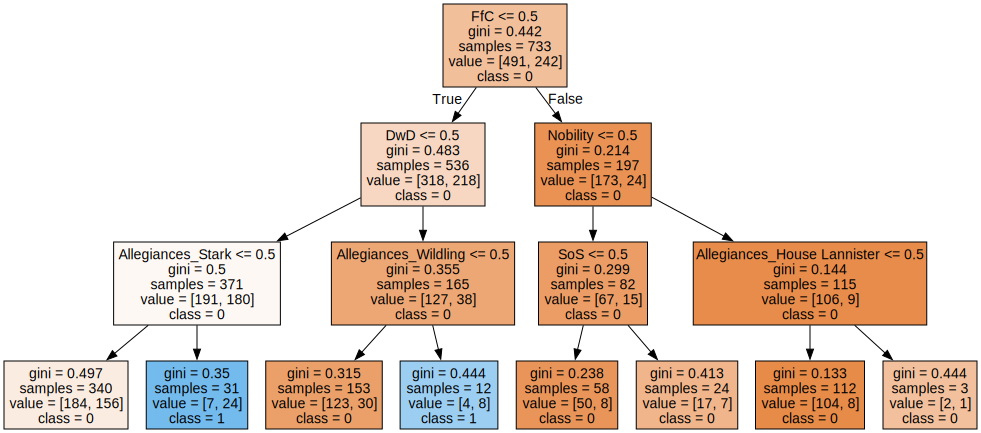

In [147]:
#畫決策樹
import graphviz
from sklearn import tree
from graphviz import Graph


# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=list(X_train.columns),  
                                class_names=["0","1"],
                                filled=True)

# Draw and save graph 
graph = graphviz.Source(dot_data, format="pdf") 
graph.render('graph.gv',format="pdf")
graph